<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U1)=
# Unidad 1

## Introducción. Método de Variables Separables

<!-- (Clase1.1)=
## Clase 1.1 

+++

### Introducción. Método de Variables Separables -->

**Segunda ley de Newton**: La aceleración $a$ de un cuerpo de masa $m$ es proporcional a la fuerza total $F$ ejercida sobre él: 

```{math}
:label: eq1.1
F=ma
```

Supongamos que un cuerpo de masa $m$ cae bajo la única influencia de la gravitación. La única fuerza que actúa sobre él es $mg$, donde $g$ es la aceleración de gravedad. Si $y$ es la altura medida hacia abajo desde una posición fija, entonces $v=\frac{dy}{dt}$ es el ritmo de cambio de su posición y su aceleración $a=\frac{dv}{dt}=\frac{d^2y}{dt^2}$ es el ritmo de cambio de la velocidad. Reemplazando en [](eq1.1) obtenemos 

```{math}
:label: eq1.2
m\frac{d^2y}{dt^2}=mg
```

Esta es una [**Ecuación Diferencial Ordinaria (EDO)**](EDO) de [**Segundo Orden**](SegundoOrden).

La ecuación [](eq1.2) puede ser reescrita como una EDO de [**Primer Orden**](PrimerOrden):

```{math}
:label: eq1.3
m\frac{dv}{dt}=mg
```

Si admitimos que el aire ejerce una fuerza de resistencia proporcional a la velocidad (con una constante de proporcionalidad $k>0$), la fuerza total que actúa sobre el cuerpo es $mg-kv$ y la ecuación [](eq1.3) queda  

\begin{equation*}
    m\frac{dv}{dt}=mg-kv 
\end{equation*}

¿Es posible determinar la velocidad $v(t)$ del cuerpo en cualquier instante $t$ si su velocidad inicial es $v(0)=v_0$?

Si consideramos esta condición, tenemos el [**Problema de Valor Inicial (PVI)**](DefPVI)

$$\mathbf{PVI}~~~~\left\{\begin{array}{ccc}m\dfrac{dv}{dt}&=&mg-kv\\&&\\ v(0)&=&v_0\end{array}\right.$$

Sin resolver explícitamente el PVI, podemos visualizar esta solución mediante el siguiente código de Python:

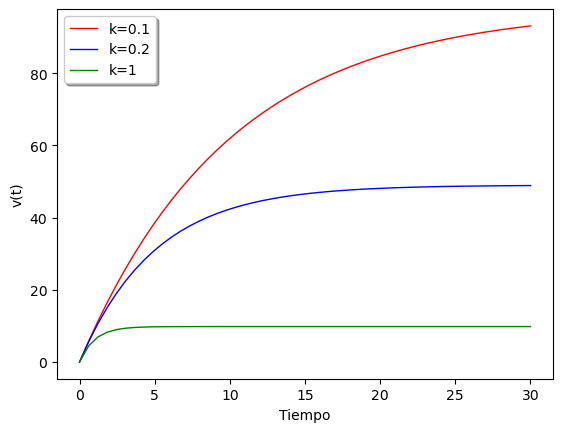

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

Para determinar una solución del PVI usamos el [**método de separación de variables**](SepVar):

\begin{align*}
    m\dfrac{dv}{dt}&=mg-kv~\Rightarrow~m\frac{dv}{mg-kv}=dt~\Rightarrow~m\int\frac{dv}{mg-kv}=\int dt\\
    &\Rightarrow -\frac{m}{k}\ln\left|mg-kv\right|=t+K_1~\Rightarrow~\ln\left|mg-kv\right|=-\frac{k}{m}t+K_2\\
    &\Rightarrow mg-kv=K_3e^{-\frac{k}{m}t}
\end{align*}

Si imponemos la condición $v(0)=v_0$ obtenemos que $K_3=mg-kv_0$. Finalmente, despejamos $v$ y la velocidad de caída del cuerpo en el instante $t$ es

$$
v(t)=\frac{mg}{k}+\left(v_0-\frac{mg}{k}\right)e^{-\frac{k}{m}t}
$$

Esta es una [**solución explícita**](Explicita) del PVI y su [**intervalo de definición**](Intervalo) es $t\in\mathbb{R}_0^+$.

Python también nos permite encontrar una solución general del PVI:

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

```{admonition} Ejercicio Aplicado y Teórico
Establezca un PVI que exprese la posición $y(t)$ del cuerpo en cualquier instante $t$ si su posición inicial es $y(0)=y_0$. Sin resolver el PVI, visualice sus soluciones para distintos valores de los parámetros involucrados. ¿Qué ocurre cuando $t\to\infty$? Finalmente, determine la solución explícita del PVI de modo analítico y también usando Python. 
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(EDOLineal)=
## Ecuaciones Lineales de Primer Orden

En la clase anterior, analizamos una EDO a partir de un modelo dado, hoy comenzaremos con una situación similar y terminaremos con la construcción de una EDO de modo general siguiendo principios físicos y matemáticos.

### Ley de Enfriamiento de Newton

Esta ley establece que la rapidez con que cambia la temperatura $T(t)$ de un cuerpo en el instante $t$ es proporcional a la diferencia entre la temperatura de dicho cuerpo y la del medio $T_m$ que lo rodea.

Así, obtenemos la EDO

$$
\frac{dT}{dt}=k(T-T_m)
$$ (eq2.1)

Si $T_m$ es constante, la ecuación [](eq2.1) es de variables separables; en cambio, si $T_m=f(t)$ (varía en el tiempo), es una EDO [**Lineal de Primer Orden**](Lineal1er).

En particular, si $T_m=20+10\sin(0.1t)$, $T(0)=100$ y $k=0.1$, la temperatura de un objeto se puede modelar como

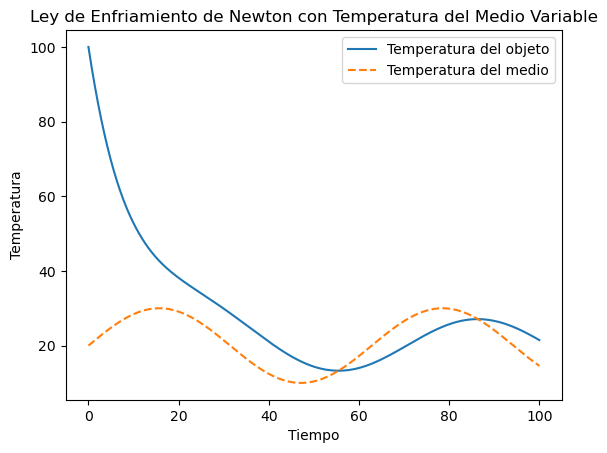

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

¿Es posible plantear un modelo más realista?

```{admonition} Ejercicio Aplicado
Obtenga los datos de la estación meteorológica del aeródromo de Tobalaba para un día cualquiera (Estación 330019). Ajuste esos datos a una curva y úsela como temperatura del medio. Estudie la situación anterior para este caso.
```

(Mezclas)=
### Mezclas

Consideremos un tanque que contiene una solución (mezcla de sal y solvente). Existen tanto flujos de entrada como de salida y se quiere calcular la cantidad $x(t)$ de solución en el tanque en el instante $t$, donde la cantidad de solución (sal) inicial en el tanque es $x(0)=x_0$.

Suponga que la sustancia, con una concentración constante de $c_i~[gr/lt]$ de solución, fluye dentro del tanque a una velocidad constante de $r_i~[lt/seg]$ y que la solución en el tanque (que permanece completamente mezclada por agitación) fluye hacia afuera a una velocidad constante de $r_0~[lt/seg]$ con una concentración de $c_0~[gr/lt]$.

```{figure} Mezclas.png
---
height: 150px
name: Mezclas
---
Modelo de Mezclas
```

Con el fin de determinar una ED0 para $x(t)$, estimamos el cambio $\Delta x$ durante un breve intervalo de tiempo $[t,t+\Delta t]$. La cantidad de sal que fluye dentro del tanque durante $\Delta t$ segundos es 

$$
r_i\cdot c_i\cdot\Delta t~[gr].
$$

Notamos que la cantidad de sal $x$ en un intervalo de tiempo infinitesimal es 

$$
\Delta x=\{gr~entrada\}-\{gr~salida\}
$$ 

$$
\approx r_i\cdot c_i\cdot\Delta t-r_0\cdot c_0\cdot\Delta t~~\Rightarrow~~\frac{\Delta x}{\Delta t}\approx r_i\cdot c_i-r_0\cdot c_0.
$$ 

Haciendo $\Delta t\to0$, obtenemos la ED 

$$
\frac{dx}{dt}=r_i\cdot c_i-r_0\cdot c_0.
$$ 

En general, la cantidad de sal que fluye hacia afuera del tanque, depende de la concentración $c_0(t)$ de sal presente en la solución en el instante $t$. Pero 

$$
c_0(t)=\frac{x(t)}{V(t)}
$$

donde $V(t)$ es el volumen de la solución en el instante $t$ ($V(t)$ es no constante a menos que $r_i=r_0$). Reemplazando, obtenemos la ED 

$$
\frac{dx}{dt}=r_i\cdot c_i-\frac{r_0}{V}\cdot x.
$$ 

Notamos que la razón de cambio del volumen en el tiempo, depende de la velocidad inicial $r_i$ y final $r_0$; es decir, 

$$
\frac{dV}{dt}=r_i-r_0~~\Rightarrow~~V(t)=(r_i-r_0)t+K.
$$

Poniendo la condición inicial $V(0)=V_0$, obtenemos $V(t)=(r_i-r_0)t+V_0$. 

Por lo tanto, la ED que modela el problema de mezclas es 

$$
\frac{dx}{dt}=r_i\cdot c_i-\frac{r_0}{(r_i-r_0)t+V_0}\cdot x
$$ 

¿Qué tipo de ecuación es esta?

```{admonition} Ejercicio Aplicado y Teórico
Determine la solución explícita de la ecuación anterior de modo analítico y también usando Python. 
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Crecimiento Poblacional. Ecuación Logística

### Crecimiento de Población

La razón con que una población $P(t)$ cambia en un cierto tiempo $t$ es proporcional a la población total $P(t)$ en ese tiempo 

$$
\frac{dP}{dt}=kP
$$ 

Esta EDO es de variables separables y su solución es $P(t)=P_0e^{kt}$, donde $P_0=P(0)$ es la población inicial. 

```{admonition} Ejercicio Teórico
De acuerdo a datos del [INE](https://www.ine.gob.cl/estadisticas/sociales/demografia-y-vitales/proyecciones-de-poblacion) la tasa de crecimiento demográfico de Chile en el año 2020 fue de un $1.12\%$ (Ver "Cuadros Estadísticos-Proyección Base 2017" documento "Estimaciones y Proyecciones 1992-2050"). Si ese año la población chilena era de $19458310$ y la tasa de crecimiento se mantiene constante, calcule la población chilena al año 2023. La estimación del INE para la población chilena del año 2023 fue de $19960889$, ¿hay alguna discrepancia con su cálculo?, ¿cómo podría explicarla para mejorar su modelo? 
```

### Un Modelo no Lineal: Ecuación Logística

El modelo anterior es uno de los más simples para la modelación del crecimiento poblacional. Para complejizarlo, podemos suponer que la tasa $k$ varía en el tiempo de la siguiente manera: Suponga que la población $P(t)$ cambia sólo por la ocurrencia de nacimientos y muertes. Sean $\beta(t)$ y $\alpha(t)$ la tasa de nacimientos y muertes, respectivamente. 

Entonces, el número de nacimientos y muertes que se registran durante el intervalo de tiempo $[t, t+\Delta t]$ está dado (aproximadamente) por 

$$
\text{nacimientos}: \beta(t)\cdot P(t)\cdot\Delta t~,~\text{muertes}: \alpha(t)\cdot P(t)\cdot\Delta t
$$

Por tanto, el cambio $\Delta P$ en la población durante el intervalo de tiempo $[t, t+\Delta t]$ es 

$$
\Delta P=[\text{nacimientos} - \text{muertes}]\approx\beta(t)\cdot P(t)\cdot\Delta t-\alpha(t)\cdot P(t)\cdot\Delta t
$$

Así 

$$
\frac{\Delta P}{\Delta t}\approx\big(\beta(t)-\alpha(t)\big)P(t)
$$

Haciendo $\Delta t\to 0$, obtenemos la EDO de **población general** 

$$
\frac{dP}{dt}=\big(\beta(t)-\alpha(t)\big)P(t)
$$

Habitualmente la tasa de nacimientos decrece en la medida en que una población se incrementa debido a, por ejemplo, una mayor sofisticación científica o cultural, hasta una limitación en el suministro de alimentos.

Para simplificar el problema, supondremos que la tasa de nacimientos $\beta(t)$ es una función lineal decreciente del tamaño de la población $P(t)$, tal que $\beta(t)=\beta_0-\beta_1P$ donde $\beta_0,\beta_1$ son constantes positivas. Si la tasa de mortalidad $\alpha(t)=\alpha_0$ permanece constante, entonces la ecuación de población general toma la forma 

$$
\frac{dP}{dt}=\big(\beta_0-\beta_1P-\alpha_0\big)P
$$

Es decir 

(eqLogistica)=
$$
\frac{dP}{dt}=aP-bP^2
$$ 

donde $a=\beta_0-\alpha_0$ y $b=\beta_1$. Si $a,b>0$ entonces la EDO anterior se denomina **ecuación logística**. El parámetro $a$ se conoce habitualmente como la **tasa de crecimiento** y $b$ como la **tasa de competencia**.

Estudiamos la ecuación logística en términos de los valores del signo de $\frac{dP}{dt}$, lo que nos permite analizar **cualitativamente** el comportamiento de la solución $P$

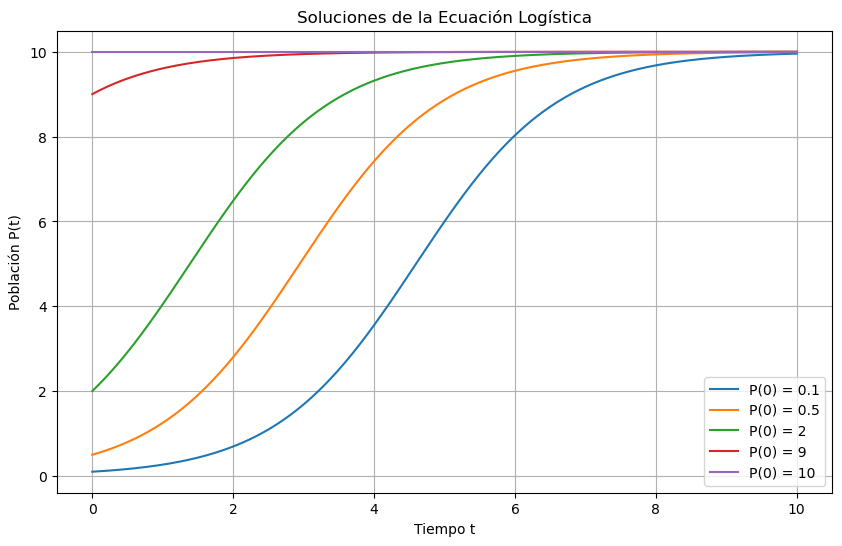

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros de la ecuación
a = 1.0  # Tasa de crecimiento
b = 0.1  # Tasa de competencia

# Ecuación diferencial logística
def logistica_ec(P, t):
    return a * P - b * P**2

# Tiempo para la integración
t = np.linspace(0, 10, 400)

# Condiciones iniciales diferentes
P0_vals = [0.1, 0.5, 2, 9, 10]

# Soluciones para cada condición inicial
sols = [odeint(logistica_ec, P0, t) for P0 in P0_vals]

# Graficar el las soluciones
plt.figure(figsize=(10, 6))
for i, P0 in enumerate(P0_vals):
    plt.plot(t, sols[i], label=f'P(0) = {P0}')
plt.xlabel('Tiempo t')
plt.ylabel('Población P(t)')
plt.title('Soluciones de la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()

Estableciendo la condición inicial $P(0)=P_0$ y separando variables, podemos obtener la solución explícita de la ecuación logística: 

$$
P(t)=\frac{aP_0}{bP_0+(a-bP_0)e^{-at}}
$$

<!-- La EDO logística es una ecuación autónoma, por lo que podemos estudiar su solución $P(t)$ de manera cualitativa: -->

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Análisis Cualitativo de las Soluciones de EDO

En la clase de hoy, estudiaremos EDO de primer orden desde un punto de vista **cualitativo**, es decir, analizaremos el comportamiento de las soluciones de una EDO sin resolverla explícitamente.

### Campos Direccionales

Consideremos la EDO de primer orden general 

$$
\frac{dy}{dx}=f(x,y)
$$ 

Notamos que para cada punto $(x,y)$ del plano, la expresión $f(x,y)$ representa la pendiente de la recta tangente a la curva solución $y$ de la EDO, ya que $y'=f(x,y)$.

Si evaluamos sistemáticamente a $f(x,y)$ en una cuadrícula rectangular de puntos en el plano $XY$ y se dibuja un segmento en cada punto $(x,y)$ de ella, con pendiente $f(x,y)$, entonces al conjunto de todos estos segmentos
se le llama **campo direccional** o **campo de pendientes** de la ecuación diferencial $y'=f(x,y)$.

```{admonition} Ejercicio Aplicado y Teórico
Considere la ecuación diferencial $y'=\sin(x)\cdot\cos(y)$. Dibuje una solución aproximada con la condición inicial $y(x_0)=y_0$. Analice su comportamiento.
```

Usando Python

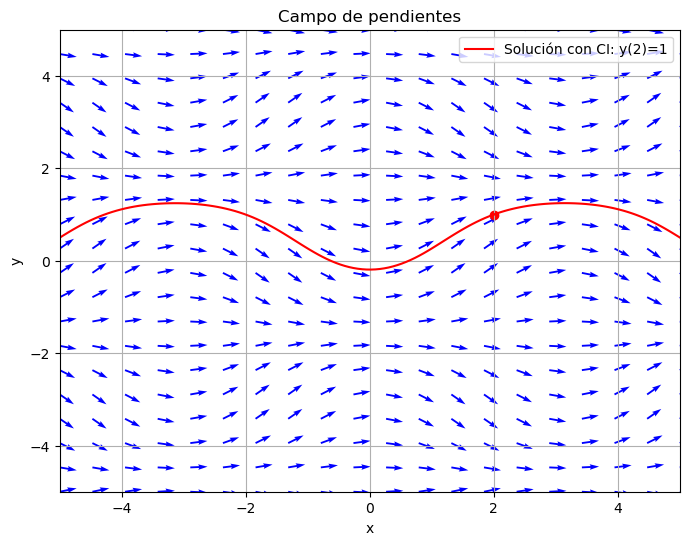

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y) #Se puede cambiar arbitrariamente

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a, b, c, d, n, x0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy", color="b")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()
plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=2, y0=1)

### Ecuaciones Diferenciales Autónomas

Una ecuación diferencial ordinaria en la que la variable independiente no aparece explícitamente se llama **autónoma**. Su forma estándar es 

$$
\frac{dy}{dx}=f(y).
$$ 

Los puntos constantes $c\in\mathbb{R}$ tales que $f(c)=0$ (donde se anula la función $f(y)$) se denominan **puntos de equilibrio** o **puntos estacionarios**, y son de importancia ya que la función constante $y(x)=c$ es solución de la EDO autónoma $y'=f(y)$. Estas soluciones constantes se denominan **soluciones de equilibrio**.

Por ejemplo, la [Ecuación Logística](eqLogistica) es una EDO autónoma.

Sin resolver una EDO autónoma, podemos decir mucho respecto a sus soluciones no constantes analizando el signo de $y'$. Para ello:

1. Determinamos las soluciones de equilibrio y las graficamos en el plano.
2. Las soluciones de equilibrio determinan regiones $R_i$ del plano. En cada una de estas regiones $y'>0$ (la solución $y$ crece) o $y'<0$ (la solución $y$ decrece). Estas soluciones siguen el campo direccional de la EDO.
3. Las soluciones no constantes son monótonas y están confinadas en cada región $R_i$.
4. Cuando $x\to\pm\infty$, las soluciones no constantes tienden a las soluciones de equilibrio o se alejan de ellas. Esto lleva a clasificar los puntos de equilibrio $c$ como:

**Atractores**. Que ocurren cuando $\displaystyle\lim_{x\to\infty}y(x)=c$, es decir, cuando las soluciones no constantes tienden a las soluciones de equilibrio. También son conocidos como puntos **asintóticamente estables**.

**Repulsores**. Que ocurren cuando las soluciones no constantes se alejan de las soluciones de equilibrio. También son conocidos como puntos **asintóticamente inestables**.

**Semiestables**. Que ocurren cuando los puntos de equilibrio poseen características de atractor y repulsor: por un lado las soluciones no constantes se acercan y por otro se alejan.

Toda esta información se puede resumir en el [**diagrama de fase**](DiagramaFase) de la EDO autónoma.

```{admonition} Ejercicio Teórico
Determine los puntos críticos y el diagrama de fase de la EDO autónoma dada. Clasifique cada punto crítico como atractor, repulsor o semiestable. 

$$
\frac{dy}{dx}=y\ln(y+2).
$$
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Diversos Tipos de EDO

### Ecuaciones Exactas. Factores Integrantes

Decimos que la ecuación diferencial 

$$
M(x,y)dx+N(x,y)dy=0
$$ 

es **exacta** si existe una función $F(x,y)$ tal que 

$$
\frac{\partial F}{\partial x}=M~~~~,~~~~\frac{\partial F}{\partial y}=N.
$$ 

Si la EDO es exacta, entonces la expresión $F(x,y)=C$ define implícitamente una solución general de la ecuación dada.

**Condición de Exactitud**. Supongamos que las funciones $M(x,y)$ y $N(x,y)$ son continuas y tienen derivadas parciales de primer orden continuas en un dominio $D$. Entonces la EDO 

$$
M(x,y)dx+N(x,y)dy=0
$$ 

es exacta en ese dominio si y solo si 

$$
\frac{\partial M}{\partial y}=\frac{\partial N}{\partial x} 
$$

**Proceso de Solución** Para resolver la EDO exacta $Mdx+Ndy=0$, integramos primero $F_x(x,y)=M(x,y)$ respecto a $x$, y escribimos

$$
F(x,y)=\int M(x,y)~dx+g(y).
$$ 

La función $g(y)$ es la *constante de integración* ya que estamos realizando una integración parcial. Luego, se determina $g(y)$ imponiendo la condición $F_y(x,y)=N(x,y)$. Esto nos lleva a una solución general en la forma implícita 

$$
F(x,y)=C.
$$

**Nota**: También es posible comenzar integrando $F_y(x,y)=N(x,y)$ respecto a $y$, y procediendo análogamente al caso anterior.

**Factores Integrantes**: La EDO 

$$
ydx+(x^2y-x)dy=0
$$ 

no es exacta porque $M_y=1$ y $N_x=2xy-1$. Sin embargo, si la multiplicamos por el factor $\frac{1}{x^2}$, nos queda la ecuación 

$$
\frac{y}{x^2}dx+\left(y-\frac1{x}\right)dy=0
$$ 

que sí es exacta. Si $Mdx+Ndy=0$ no es exacta, ¿bajo qué condiciones existe y podemos encontrar un [**factor integrante**](FacInt) $\mu(x,y)$ tal que $\mu Mdx+\mu Ndy=0$ sea exacta? Para simplificar el problema, estudiamos sólo 2 posibilidades: 

1.  Si $\mu(x)$ es solo función de $x$: Tenemos

$$
\frac{\mu_x}{\mu}=\frac{M_y-N_x}{N}~~\Rightarrow~~\mu(x)=e^{\int\frac{M_y-N_x}{N}~dx}
$$ 

Recíprocamente, si $\displaystyle e^{\int\frac{M_y-N_x}{N}~dx}$ es solo función de $x$ entonces $\mu$ tambión lo es y corresponde a un factor integrante de $Mdx+Ndy=0$.

2. Si $\mu(y)$ es solo función de $y$: Tenemos

$$
\frac{\mu_y}{\mu}=\frac{M_y-N_x}{-M}~~\Rightarrow~~\mu(y)=e^{\int\frac{M_y-N_x}{-M}~dy}
$$ 

Recíprocamente, si $\displaystyle e^{\int\frac{M_y-N_x}{-M}~dy}$ es solo función de $y$ entonces $\mu$ también lo es y corresponde a un factor integrante de $Mdx+Ndy=0$.

### Ecuaciones Homogéneas

Una función $f(x,y)$ se llama **homogénea** de grado $\alpha\in\mathbb{R}$ si

$$
f(tx,ty)=t^{\alpha}f(x,y)~~,~~t\in\mathbb{R}~~\textrm{parámetro}.
$$ 

Una EDO de la forma 

$$
M(x,y)dx+N(x,y)dy=0
$$ 

se llama **ecuación homogénea** si las funciones $M(x,y)$ y $N(x,y)$ son ambas homogéneas del mismo grado.

**Proceso de Solución** Toda EDO homogénea se resuelve mediante la sustitución 

$$
y=ux~~\Rightarrow~~dy=u~dx+ x~du,
$$ 

donde $u$ es una variable auxiliar. Reemplazando en la EDO homogénea y simplificando, obtenemos una ecuación de variables separables en $u$ y $x$:

$$
\frac{dx}{x}+\frac{N(1,u)}{M(1,u)+uN(1,u)}du=0
$$ 

que se resuelve usando el [**método de separación de variables.**](SepVar)

### Bernoulli

Una EDO de la forma 

$$
y'+P(x)y=Q(x)y^n~,n\in\mathbb{R}
$$ 
se conoce como **ecuación de Bernoulli**. Si $n=0$ tenemos un EDO [lineal de primer orden](Lineal1er) y si $n=1$ nos queda de [variables separables](SepVar).

Toda ecuación de Bernoulli se resuelve mediante la sustitución 

$$
u=y^{1-n}.
$$ 

Dividiendo la EDO por $y^n$, reemplazando y simplificando, llegamos a la [ecuación lineal de primer orden](Lineal1er) 

$$
u'+(1-n)P(x)u=(1-n)Q(x)
$$

### Reducción por Sustitución Lineal de $y'=f(ax+by+c)$

La EDO específica 

$$
y'=f(ax+by+c)~~,~~a,b,c\in\mathbb{R}
$$ 

puede ser resuelta usando la sustitución 

$$
z=ax+by+c~\Rightarrow ~z'=a+by'.
$$ 

Reemplazando en la EDO y simplificando, obtenemos una ecuación de [variables separables](SepVar) en $x$ y $z$, a saber: 

$$
\frac{dz}{bf(z)+a}=dx
$$

```{admonition} Ejercicios Teóricos
Resuelva las siguientes ecuaciones diferenciales:

1. $(x^3+xy^3)dx+3y^2dy=0$
2. $(x^2+y^2)dx+(x^2-xy)dy=0$
3. $y'-\frac{2}{x}y=-x^2y^2$
4. $y'=(x+y)^2$
```

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Teorema de Existencia y Unicidad

Consideremos los siguientes PVI:

$$
\mathbf{(1)}~\left\{\begin{array}{ccc}y'&=&2\sqrt{y}\\&&\\ y(2)&=&0\end{array}\right.
$$

Sus soluciones son $y(x)=0$ (trivial) e $y(x)=(x-2)^2$ para $x\geq2$. En Python:

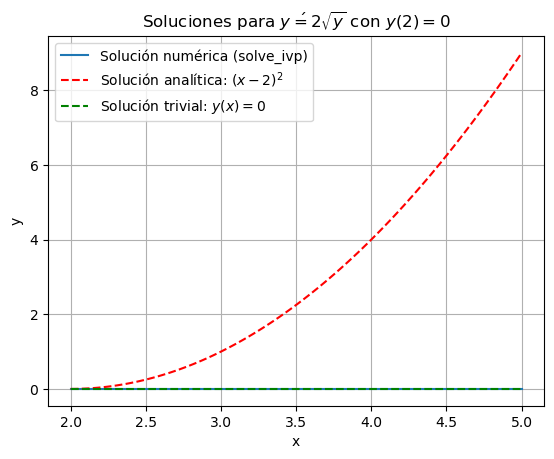

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos la función f(x, y)
def f(x, y):
    return 2 * np.sqrt(y)

# Condiciones iniciales
x0 = 2
y0 = 0

# Intervalo de integración
x_span = [x0, 5]

# Resolver la EDO usando solve_ivp
sol = solve_ivp(f, x_span, [y0], method='RK45', t_eval=np.linspace(x0, 5, 100))

# Solución analítica: y(x) = (x - 2)^2
x = np.linspace(2, 5, 100)
y_analitica = (x - 2)**2

# Solución trivial: y(x) = 0
y_trivial = np.zeros_like(x)

# Visualizar las soluciones
plt.plot(sol.t, sol.y[0], label='Solución numérica (solve_ivp)')
plt.plot(x, y_analitica, 'r--', label='Solución analítica: $(x-2)^2$')
plt.plot(x, y_trivial, 'g--', label='Solución trivial: $y(x) = 0$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Soluciones para $y\' = 2\sqrt{y}$ con $y(2) = 0$')
plt.legend()
plt.grid(True)
plt.show()

$$
\mathbf{(2)}~\left\{\begin{array}{ccc}y'&=&2\sqrt{y}\\&&\\ y(0)&=&-1\end{array}\right.
$$ 

No tiene solución.

$$
\mathbf{(3)}~\left\{\begin{array}{ccc}y'&=&x\sqrt{y}\\&&\\ y(0)&=1\end{array}\right.
$$ 

Tiene solución única $y(x)=\left(\frac{x^2}{4}+1\right)^2$.

$$
\mathbf{(4)}~\left\{\begin{array}{ccc}xy'&=&y-1\\&&\\ y(0)&=&1\end{array}\right.
$$ 

Tiene infinitas soluciones $y(x)=1+cx$, $c\in\mathbb{R}$. En Python:

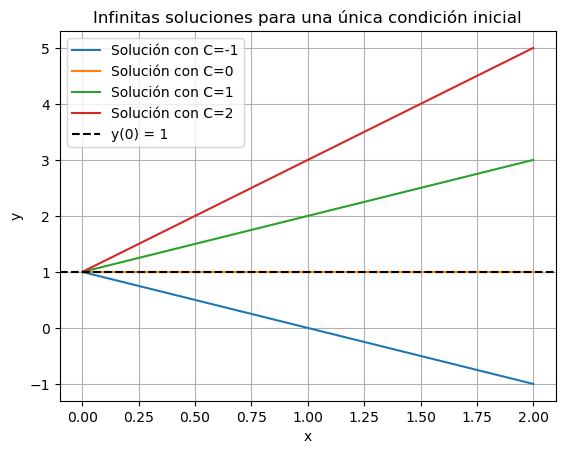

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y)
def f(x, y):
    # Evitamos la división por cero para x = 0
    return np.divide(y-1, x, out=np.zeros_like(x), where=x!=0)

# Condiciones iniciales
x0 = 0
y0 = 1

# Intervalo de integración
x = np.linspace(x0, 2, 100)

# Soluciones para diferentes valores de C
C_vals = [-1, 0, 1, 2]
sols = [1+C * x for C in C_vals]

# Visualizar las soluciones
for i, y_sol in enumerate(sols):
    plt.plot(x, y_sol, label=f'Solución con C={C_vals[i]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Infinitas soluciones para una única condición inicial')
plt.axhline(1, color='black', linestyle='--', label='y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()

¿Bajo qué condiciones un PVI tiene al menos una solución? ¿Bajo qué condiciones un PVI tiene una única solución?

**Teorema de Existencia y Unicidad (TEU)**: Sea $R$ un rectángulo tal que $(a,b)\in\mathbb{R}$. Si $f(x,y)$ y $\frac{\partial f}{\partial y}$ son continuas en $R$ entonces existe algún intervalo $I$ y una única función $y(x)$ definida en $I$ que es solución del PVI  

$$
\left\{\begin{array}{ccc}y'&=&f(x,y)\\ y(a)&=&b\end{array}\right.
$$ 

```{figure} TEU.png
---
height: 200px
name: TEU
---
Teorema de Existencia y Unicidad
```
La demostración del TEU excede los objetivos del curso. Para estudiarla, recomendamos ver el libro de George Simmons *Ecuaciones Diferenciales*, Segunda Edición, Página 571: **Teorema de Picard**.

**Nota**: Las condiciones del TEU son suficientes, pero no necesarias. Si no se cumplen, puede ocurrir cualquier situación con las soluciones del PVI asociado.

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Actividad de Cierre Unidad 1

### Problema 1: Resolución de Ecuaciones Diferenciales 

(a) Determine la solución de $xy'+y=\ln(x)$ con $y(1)=1$.

(b) Resuelva la ecuación diferencial $y'=\dfrac{1-xy^2}{2x^2y}$ usando el cambio de variables $y=zx^{-1/2}$.

### Problema 2: Modelamiento y Análisis Cualitativo 

En la teoría del aprendizaje, se supone que la rapidez con que se memoriza algo es proporcional a la cantidad que queda por memorizar. Suponga que $M$ denota la cantidad total de un tema que se debe memorizar y que $A(t)$ es la cantidad memorizada al tiempo $t$.

(a) Plantee un PVI que modele la situación.

(b) Estudie cualitativamente el problema anterior para diversas condiciones iniciales. El código siguiente puede ser de utilidad (rellene los símbolos ¿? con sus opciones):

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
# Cantidad total a memorizar
M = ## ¿? 
# Valor fijo de la constante de proporcionalidad
k = ## ¿?  

# Diferentes condiciones iniciales
A0_values = ## [¿?, ¿?, ¿?, ¿?]

# Definición de la ecuación diferencial
def dA_dt(t, A, k):
    return ## ¿? Ponga aquí su modelo del inciso (a)

# Tiempo de integración
t_eval = np.linspace(0, 10, 300)

# Resolver y graficar para diferentes condiciones iniciales
plt.figure(figsize=(10, 6))

for A0 in A0_values:
    sol = solve_ivp(dA_dt, [0, 10], [A0], args=(k,), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'A(0) = {A0/M}M')

# Configuración del gráfico
plt.title('Memorización a lo largo del tiempo con diferentes condiciones iniciales')
plt.xlabel('Tiempo t')
plt.ylabel('Cantidad memorizada A(t)')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (3181253743.py, line 7)

(c) En la película [**Matrix**](https://es.wikipedia.org/wiki/The_Matrix) el protagonista [*Neo*](https://es.wikipedia.org/wiki/Neo_(Matrix)) aprende de manera automática tras descargar un programa en su cerebro. En este contexto (hipotético), podemos suponer que él es capaz de duplicar inicialmente la cantidad total de un tema que debe memorizar. ¿Qué ocurre en este escenario? ¿Es factible que su memoria crezca sin límite?

(d) Proponga una mejora del modelo del inciso (a) haciendo hipótesis razonables. Explique sus suposiciones. Luego analice cualitativamente la solución del nuevo modelo.

### Problema 3: Teorema de Existencia y Unicidad

Determine la región $R$ más grande en el plano $XY$ tal que el PVI:

$$
y'=\frac{1}{\sqrt{y+x}}-1~~,~~y(x_0)=y_0
$$ 

tenga solución única. Esboce el gráfico de tal región $R$. Resuelva el PVI anterior con $y(0)=1$.

### Prueba

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
pio.renderers.default = 'iframe'

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()